Buscamos resolver la ecuación $$\Delta u = f,$$ $$u\big{|}_{\Omega} = g,$$ $$\Omega = [a,b] \times [c,d] $$

O equivalentemente
\begin{align*}
\Delta u &= f\\
f(a,y) &= f_1(y) \\
f(b,y) &= f_2(y) \\
f(x,c) &= f_3(x) \\
f(x,d) &= f_4(x) \\
a < & x < b \\
c < & y < d
\end{align*}

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linspace as lin

'''
    Datos del problema:
'''
a,b = 0,2
c,d = 0,1
f1 = lambda x: 0
f2 = lambda x: 2*np.exp(x)
f3 = lambda x: x
f4 = lambda x: np.exp(1)*x
f = lambda x,y: x*np.exp(y)
solution = lambda x,y: x*np.exp(y)

El problema a resolver es $$\Delta u = xe^y,$$ con condiciones de frontera
$$ u(0,y) = 0, u(2,y)= 2 e^y $$
$$ u(x,0) = x, u(x,1)= ex $$

cuya solución exacta es $s(x,y) = xe^y$.

El esquema iterativo es el siguiente

$$
\dfrac{1}{h^2} U_{i+1,j} + \left(\dfrac{-2}{h^2} + \dfrac{-2}{k^2}\right) U_{i,j} + \dfrac{1}{h^2} U_{i-1,j} + \dfrac{1}{k^2} U_{i,j+1} + \dfrac{1}{k^2} U_{i,j-1} = f_{i,j}
$$

O equivalentemente, haciendo $\nu = \frac{h^2}{k^2}, z = 2(1+\nu)$:

$$
z u_{ij} - ( u_{i+1,j} + u_{i-1,j}) - \nu (u_{i,j+1} + u_{i,j-1}) = -h^2 f_{ij}
$$

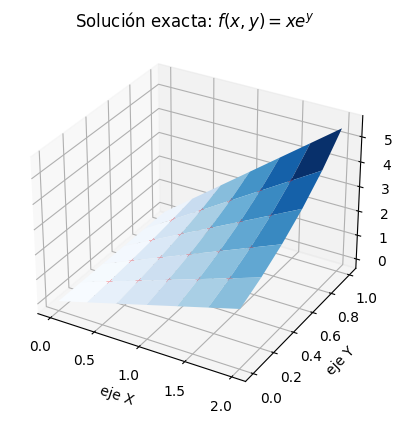

In [7]:
'''
    Ensamblando el problema
    n,m >= 4
'''
n,m = 6,5
h,k = (b-a)/n, (d-c)/m
xx = np.array([a+i*h for i in range(n+1)])
yy = np.array([c+i*k for i in range(m+1)])
v = h**2/k**2
z = 2*(1+v)

#ensamblando A
sombra = (n-1)*(m-1)
A = np.zeros((sombra,sombra),float)
for k in range(sombra-1):
  A[k][k] = z
  A[k][k+1] = -v
  A[k+1][k] = -v
A[sombra-1][sombra-1] = z
for k in range(m-1,sombra):
  A[k-m+1][k] = -1
  A[k][k-m+1] = -1
for i in range(1,n-1):
  A[i*(m-1)-1][i*(m-1)] = 0
  A[i*(m-1)][i*(m-1)-1] = 0

#ensamblando B
B = -h**2 * np.array([[
    f(xx[i],yy[j]) for j in range(1,m)]
                      for i in range(1,n)]).flatten()
r1 = np.zeros((n-1,m-1),float)
r2 = np.zeros((n-1,m-1),float)
for j in range(m-1):
  r1[0][j] = f1(yy[j+1])
for j in range(m-1):
  r1[-1][j] = f2(yy[j+1])
for i in range(n-1):
  r2[i][0] = f3(xx[i+1])
for i in range(n-1):
  r2[i][-1] = f4(xx[i+1])
r1 = r1.flatten()
r2 = r2.flatten()
B += r1 + v*r2


alfa = np.linalg.solve(A,B)
FXY = np.array([[solution(xx[i],yy[j]) for j in range(1,m)] for i in range(1,n)])
alfa = np.reshape(alfa,(n-1,m-1))

# print(np.linalg.norm(alfa-FXY))
# for i in range(n-1):
#   print("coordenada x fija, valor: ", xx[i+1])
#   for j in range(m-1):
#     print("coordenada y variando, valor: ", y[i+1])
#     print("error: ", np.abs(alfa[i][j]-solution(xx[i+1],yy[j+1])))


from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
X, Y = np.meshgrid(xx,yy)
Z = solution(X,Y)
ax = plt.axes(projection='3d')
for i in range(n-1):
  for j in range(m-1):
    ax.scatter(xx[i+1], yy[j+1], alfa[i][j], c = 'red', label = 'puntos discretizados',edgecolor = 'None')
ax.plot_surface(X,Y,Z, cmap = 'Blues')
ax.set_title('Solución exacta: $f(x,y) = x e^y$')
# ax.view_init(90,-135)
ax.set_xlabel('eje X')
ax.set_ylabel('eje Y')
plt.show()